In [24]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
from matplotlib import pyplot as plt

## import data

In [25]:
sl_full = pd.read_pickle('../data/sl_full_cleaned.pkl')
sl_full

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,month,year
76168,LKA,Asia,Sri Lanka,2020-01-27,1.0,1.0,0.0,0.0,0.047,0.047,...,0.7,197.093,10.68,0.3,27.0,3.6,76.98,0.782,1,2020
76169,LKA,Asia,Sri Lanka,2020-01-28,1.0,0.0,0.0,0.0,0.047,0.000,...,0.7,197.093,10.68,0.3,27.0,3.6,76.98,0.782,1,2020
76170,LKA,Asia,Sri Lanka,2020-01-29,1.0,0.0,0.0,0.0,0.047,0.000,...,0.7,197.093,10.68,0.3,27.0,3.6,76.98,0.782,1,2020
76171,LKA,Asia,Sri Lanka,2020-01-30,1.0,0.0,0.0,0.0,0.047,0.000,...,0.7,197.093,10.68,0.3,27.0,3.6,76.98,0.782,1,2020
76172,LKA,Asia,Sri Lanka,2020-01-31,1.0,0.0,0.0,0.0,0.047,0.000,...,0.7,197.093,10.68,0.3,27.0,3.6,76.98,0.782,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76640,LKA,Asia,Sri Lanka,2021-05-13,135796.0,2269.0,892.0,42.0,6341.681,105.962,...,0.7,197.093,10.68,0.3,27.0,3.6,76.98,0.782,5,2021
76641,LKA,Asia,Sri Lanka,2021-05-14,138085.0,2289.0,923.0,31.0,6448.577,106.896,...,0.7,197.093,10.68,0.3,27.0,3.6,76.98,0.782,5,2021
76642,LKA,Asia,Sri Lanka,2021-05-15,140471.0,2386.0,941.0,18.0,6560.004,111.426,...,0.7,197.093,10.68,0.3,27.0,3.6,76.98,0.782,5,2021
76643,LKA,Asia,Sri Lanka,2021-05-16,142746.0,2275.0,962.0,21.0,6666.246,106.243,...,0.7,197.093,10.68,0.3,27.0,3.6,76.98,0.782,5,2021


In [26]:
district_data = pd.read_csv('../data/disdrict distribution.csv')
district_data

,Date,AMPARA,ANURADHAPURA,BADULLA,BATTICOLOA,COLOMBO,GALLE,GAMPAHA,HAMBANTOTA,JAFFNA,...,MATALE,MATARA,MONERAGALA,MULLATIVU,NUWARAELIYA,POLONNARUWA,PUTTALAM,RATNAPURA,TRINCOMALEE,VAVUNIA
0,1-Apr-2020,0,0,1,1,32,1,11,0,1,...,0,1,0,0,0,0,25,3,0,0
1,2-Apr-2020,0,0,1,1,33,1,11,0,4,...,0,1,0,0,0,0,25,3,0,0
2,3-Apr-2020,0,0,1,1,36,1,11,0,4,...,0,1,0,0,0,0,25,3,0,0
3,4-Apr-2020,0,0,1,1,38,1,11,0,7,...,0,1,0,0,0,0,26,3,0,0
4,5-Apr-2020,0,0,1,1,42,1,11,0,7,...,0,1,0,0,0,0,27,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,14-May-2021,511,1074,2130,667,39626,4016,25267,1232,1720,...,2566,2718,1528,89,2138,554,2329,4284,909,519
408,15-May-2021,511,1114,2158,667,40272,4215,25628,1277,1801,...,2568,2764,1542,98,2220,559,2354,4330,911,523
409,16-May-2021,516,1119,2203,675,40862,4336,26053,1376,1843,...,2647,2817,1592,98,2224,559,2382,4368,933,524
410,17-May-2021,528,1121,2302,682,41206,4538,26353,1405,1886,...,2669,3007,1641,105,2442,561,2429,4385,938,542


In [27]:
daily_data = pd.read_csv('../data/daily situation.csv')
daily_data

,Number inward as at yesterday-10 am,COVID 19 Positive - last 24H,Discharged from the hospital - last 24H,Number of deaths - last 24H,Number inward as at today-10 am,Date,Total Number Confirmed,Total Number Recovered,Total Number of Deaths
0,104,21,2,0,123,1-Apr-2020,143,18,2
1,123,5,3,1,124,2-Apr-2020,148,21,3
2,124,3,1,1,125,3-Apr-2020,151,22,4
3,125,8,3,1,129,4-Apr-2020,159,25,5
4,129,7,4,0,132,5-Apr-2020,166,29,5
...,...,...,...,...,...,...,...,...,...
407,23857,2269,1306,24,24796,14-May-2021,135796,110108,892
408,19036,2289,1352,29,19944,15-May-2021,138085,117220,921
409,19944,2386,1102,20,21208,16-May-2021,140471,118322,941
410,21208,2275,1307,21,22155,17-May-2021,142746,119629,962


## smoothing

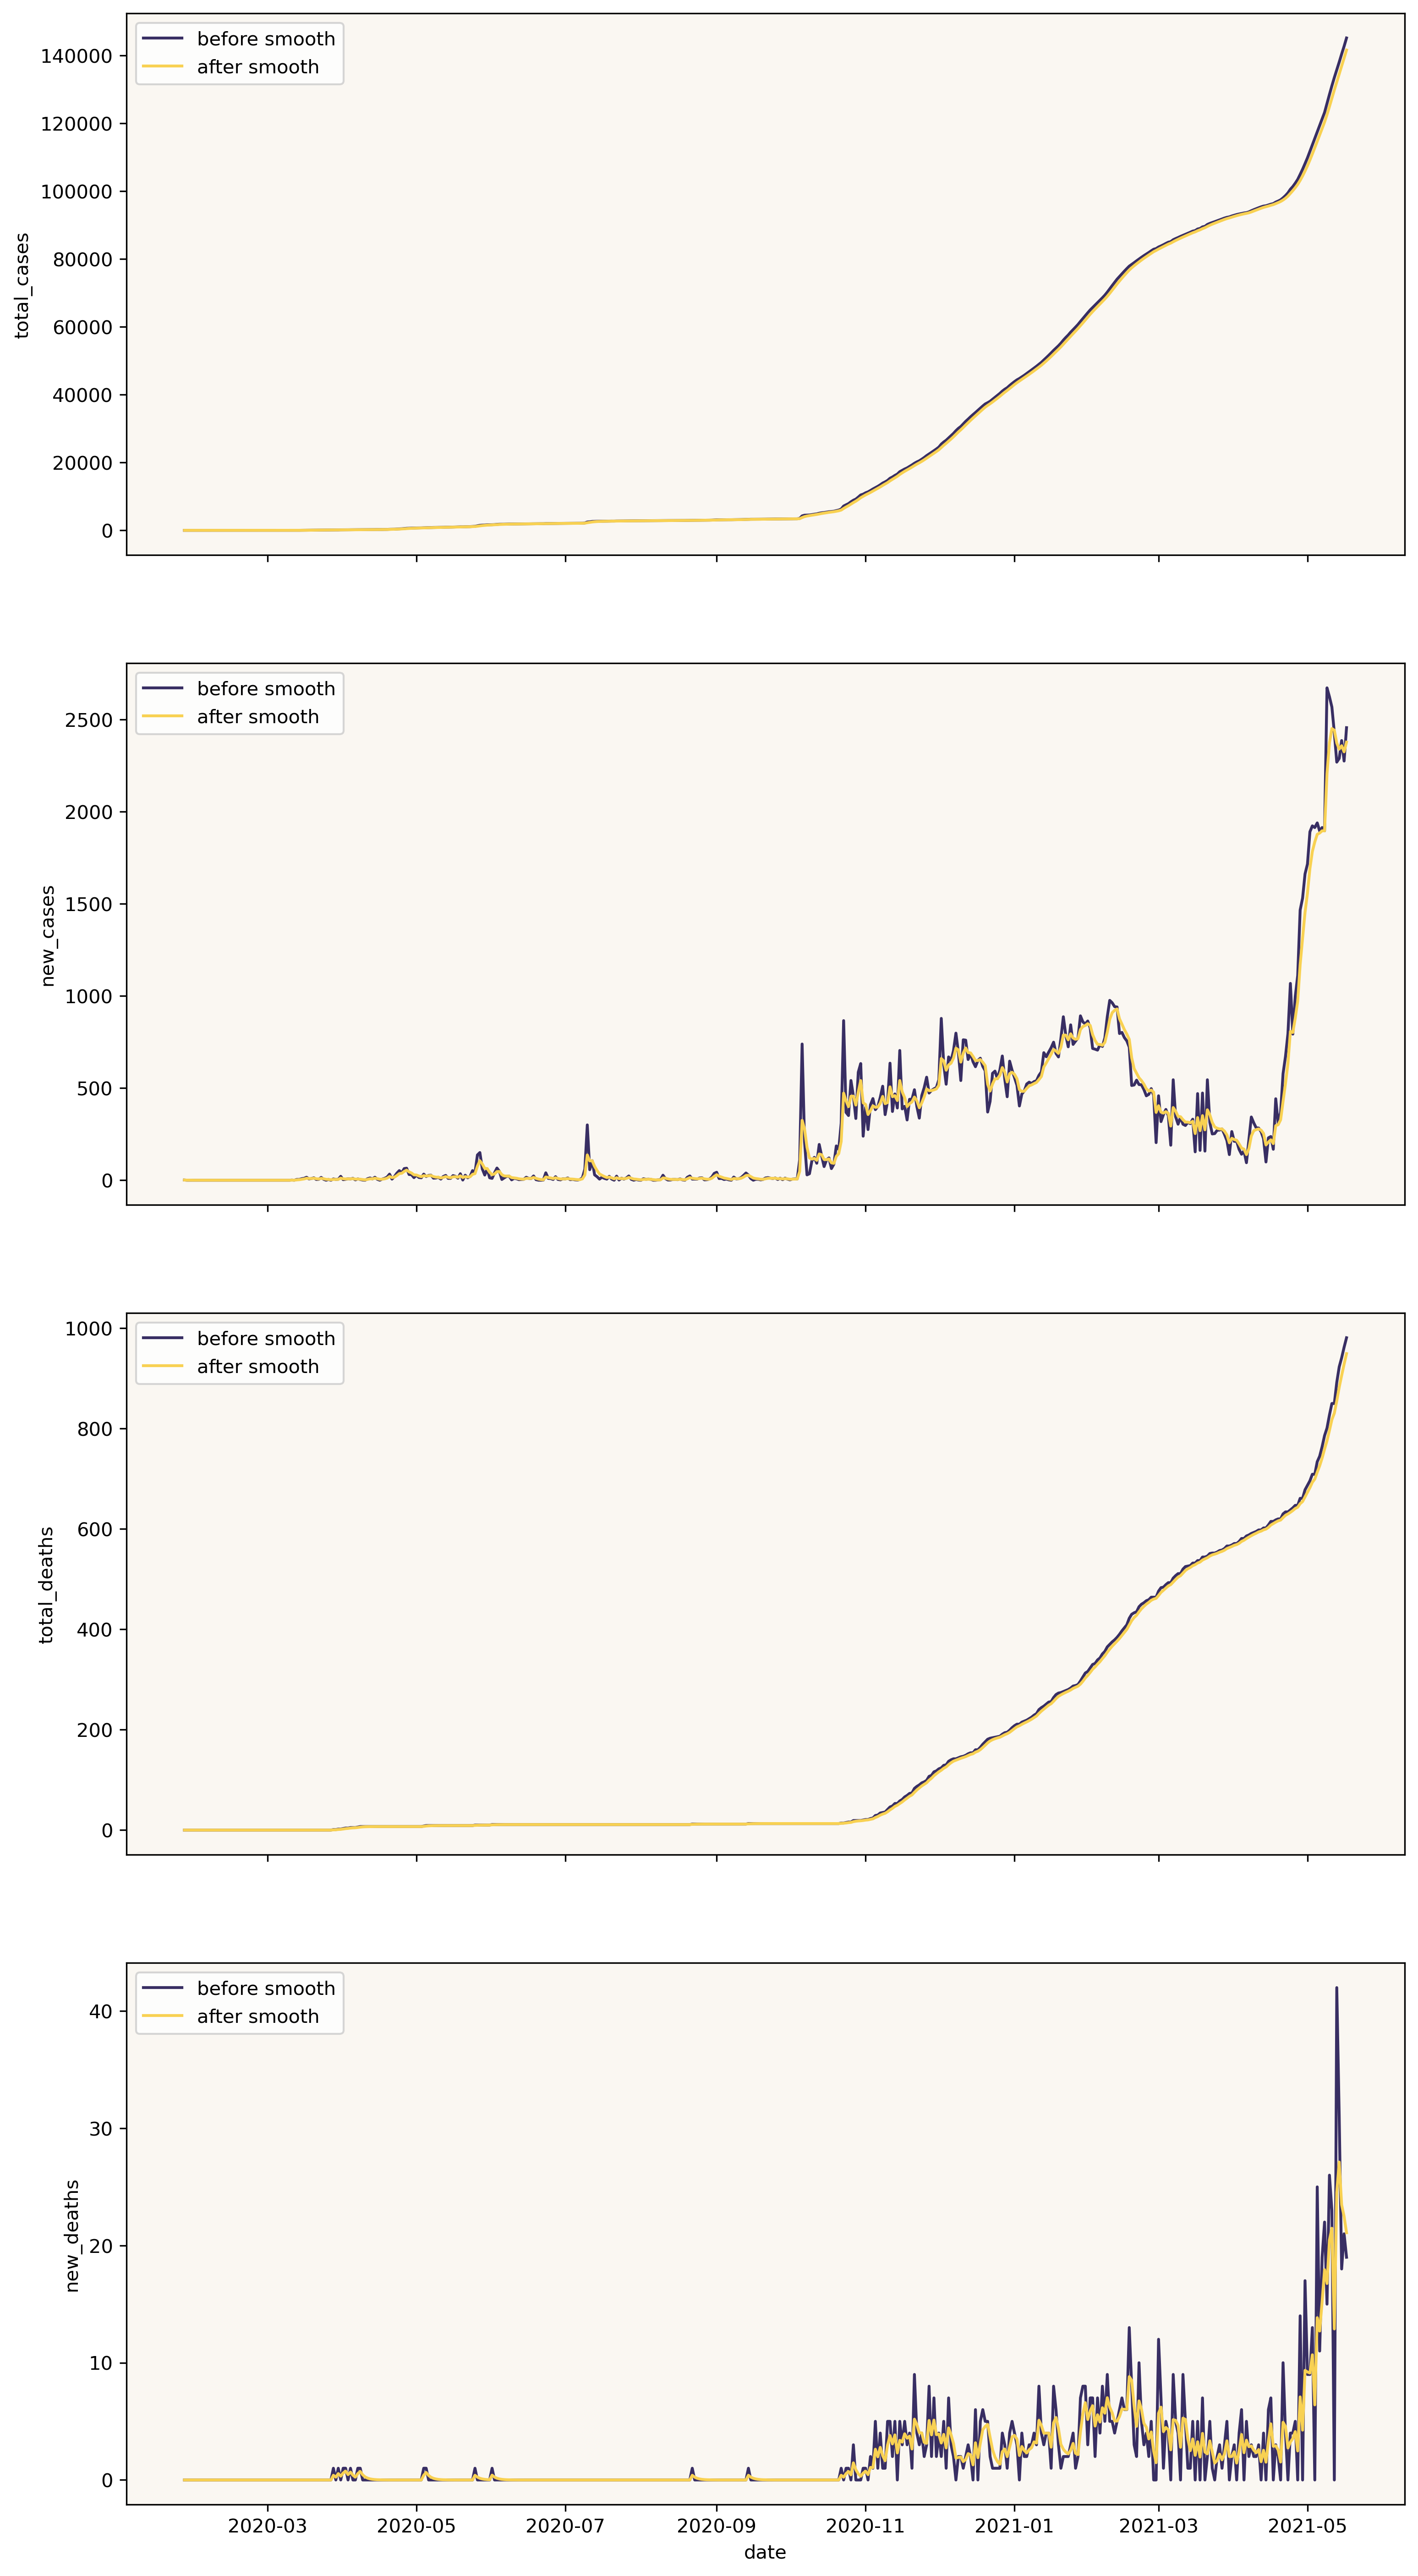

In [38]:
figure, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=[12, 24], dpi=300)
axes = axes.ravel()

feat_smooth = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths']
smoothed = pd.DataFrame(columns=['total_cases_smoothed', 'new_cases_smoothed',
                                 'total_deaths_smoothed', 'new_deaths_smoothed'])

for i in range(len(feat_smooth)):
    smoothed[smoothed.columns[i]] = sl_full[feat_smooth[i]].ewm(alpha=0.4).mean()

for i in range(len(axes)):
    sns.lineplot(x=sl_full['date'], y=sl_full[feat_smooth[i]], ax=axes[i], label='before smooth', color='#382E63')
    sns.lineplot(x=sl_full['date'], y=smoothed[smoothed.columns[i]], ax=axes[i], label='after smooth', color='#F8D152')
    axes[i].set_facecolor('#FAF7F2')

plt.show()